Баранов Д.А. ИВТ 2.1.

Лабораторная работа №1

Задание 1.1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Статистика online spend:
Максимальное значение: 4556.93
Минимальное значение: 320.25
Среднее значение: 1905.881
Медиана: 1881.940
Стандартное отклонение (std): 808.857
Дисперсия: 654249.409

Статистика по Offline spread:
Максимальное значение: 5000
Минимальное значение: 500
Среднее значение: 2843.562
Медиана: 2843.562
Стандартное отклонение (std): 952.292
Дисперсия: 906860.906

Общая статистика по marketingSpend.csv:
           Offline       Online
count   365.000000   365.000000
mean   2843.561644  1905.880740
std     952.292448   808.856853
min     500.000000   320.250000
25%    2500.000000  1258.600000
50%    3000.000000  1881.940000
75%    3500.000000  2435.120000
max    5000.000000  4556.930000

Информация о датасете marketingSpend.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     365 non-null    object 
 1   Offline  365 non-null    

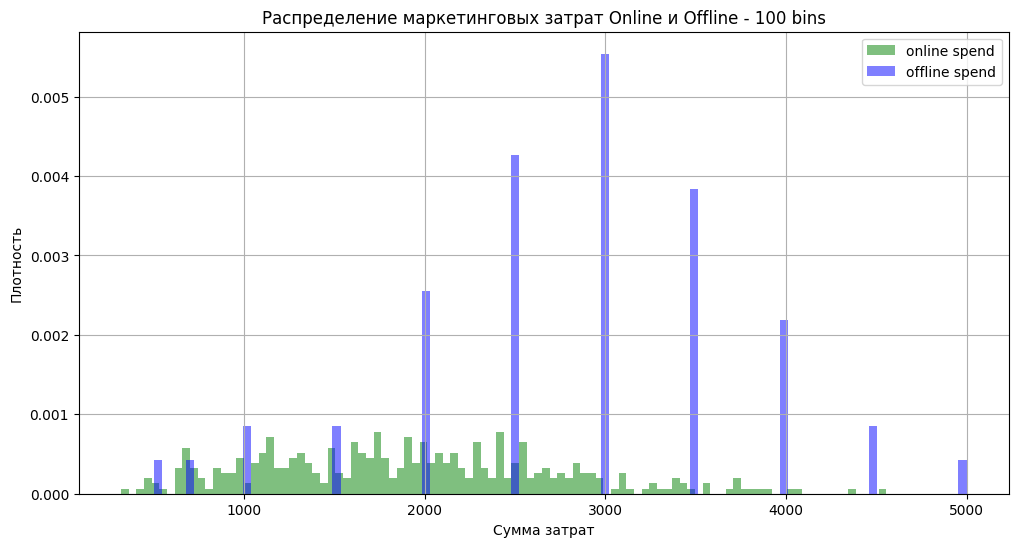

In [31]:
marketing_data = pd.read_csv('/content/MarketingSpend.csv', header = 0, names = ['Date', 'Offline', 'Online'])
retail_data = pd.read_csv('/content/Retail.csv')

print("Статистика online spend:")
print(f"Максимальное значение: {marketing_data['Online'].max()}")
print(f"Минимальное значение: {marketing_data['Online'].min()}")
print(f"Среднее значение: {marketing_data['Online'].mean():.3f}")
print(f"Медиана: {marketing_data['Online'].median():.3f}")
print(f"Стандартное отклонение (std): {marketing_data['Online'].std():.3f}")
print(f"Дисперсия: {marketing_data['Online'].var():.3f}")

print("\nСтатистика по Offline spread:")
print(f"Максимальное значение: {marketing_data['Offline'].max()}")
print(f"Минимальное значение: {marketing_data['Offline'].min()}")
print(f"Среднее значение: {marketing_data['Offline'].mean():.3f}")
print(f"Медиана: {marketing_data['Offline'].mean():.3f}")
print(f"Стандартное отклонение (std): {marketing_data['Offline'].std():.3f}")
print(f"Дисперсия: {marketing_data['Offline'].var():.3f}")

print("\nОбщая статистика по marketingSpend.csv:")
print(marketing_data.describe())

plt.figure(figsize = (12, 6))

marketing_data['Online'].hist(bins = 100, alpha = 0.5, color = 'green', label = 'online spend', density = True)
marketing_data['Offline'].hist(bins = 100, alpha = 0.5, color = 'blue', label = 'offline spend', density = True)

plt.title("Распределение маркетинговых затрат Online и Offline - 100 bins")
plt.xlabel("Сумма затрат")
plt.ylabel("Плотность")
plt.legend()
plt.grid(True)

print("\nИнформация о датасете marketingSpend.csv:")
print(marketing_data.info())

print('-' * 50)

print("\nОбщая статистика по retail.csv:")
print(retail_data.describe())

num_invoices = len(retail_data['InvoiceNo'].unique())
print(f"\nКоличество уникальных запросов: {num_invoices}")

num_stockcodes = len(retail_data['StockCode'].unique())
print(f"Количество уникальных товаров(StockCode): {num_stockcodes}")

top_10_stockcodes = retail_data['StockCode'].value_counts().head(10)
print("\nТоп-10 самых заказываемых товаров (StockCode):")
print(top_10_stockcodes)

print('-' * 50)
plt.show()

Задание 1.2

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

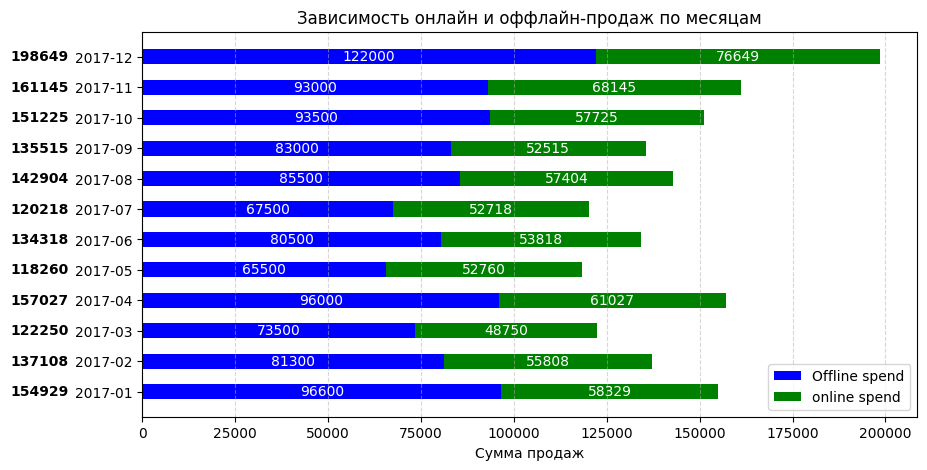

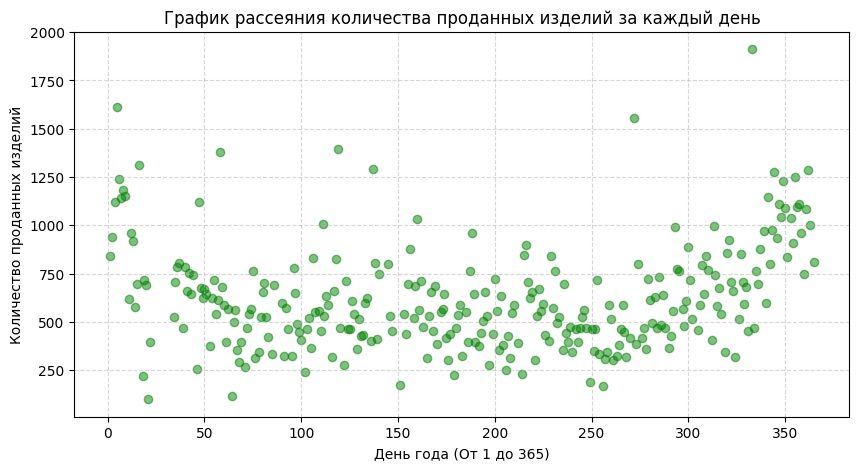

In [35]:
marketing_data = pd.read_csv('/content/MarketingSpend.csv', header = 0, names = ['Date', 'Offline', 'Online'], parse_dates = ['Date'])
retail_data = pd.read_csv('/content/Retail.csv', parse_dates = ['InvoiceDate'])

""" График 1 """

marketing_data['Month'] = marketing_data['Date'].dt.strftime('%Y-%m')
monthly_sales = marketing_data.groupby('Month')[['Offline', 'Online']].sum()

fig, ax = plt.subplots(figsize = (10, 5))
bar_height = 0.5
months = range(len(monthly_sales))

ax.barh(months, monthly_sales['Offline'], height = bar_height, label = 'Offline spend', color = 'blue')
ax.barh(months, monthly_sales['Online'], height = bar_height, left = monthly_sales['Offline'], label = 'online spend', color = 'green')

for i, (offline, online) in enumerate(zip(monthly_sales['Offline'], monthly_sales['Online'])):
  ax.text(offline / 2, i, f'{offline:.0f}', va = 'center', ha = 'center', color = 'white', fontsize = 10)
  ax.text(offline + online / 2, i, f'{online:.0f}', va = 'center', ha = 'center', color = 'white', fontsize = 10)
  ax.text(-max(monthly_sales['Offline'] + monthly_sales['Online']) * 0.1, i, f'{offline + online:.0f}', va = 'center', ha = 'right', color = 'black', fontsize = 10, fontweight = 'bold')

ax.set_yticks(months)
ax.set_yticklabels(monthly_sales.index)
ax.set_xlabel('Сумма продаж')
ax.set_title('Зависимость онлайн и оффлайн-продаж по месяцам')
ax.legend()
plt.grid(axis = 'x', linestyle = '--', alpha = 0.5)
plt.show()

""" График 2 """

daily_sales = retail_data.groupby('InvoiceDate')['StockCode'].count().reset_index()
daily_sales['DayOfYear'] = daily_sales['InvoiceDate'].dt.dayofyear

plt.figure(figsize = (10, 5))
plt.scatter(daily_sales['DayOfYear'], daily_sales['StockCode'], color = 'green', alpha = 0.5)
plt.xlabel('День года (От 1 до 365)')
plt.ylabel('Количество проданных изделий')
plt.title('График рассеяния количества проданных изделий за каждый день')
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.show()